# Machine Learning with scikit-learn

Sometimes the features you have available in your initial data have little predictive strength when used in the most straightforward way.  This might be true almost regardless of choice of model class and hyperparameters.  And yet it might also be true that there are synthetic features latent in the data that are highly predictive, but that have to be *engineered* (mechanically, rather than sample-wise modification) to produce powerful features.

At the same time, a highly dimension model—whether of high dimension because of the initial data collection or because of creation of extra synthetic features—may lend itself less well to modeling techniques.  In these cases, it can be more computationally tractable, as well as more predictive, to work with a subset of all available features.

This is the last of three lessons that can be thought of broadly as "Feature Engineering." This lesson focuses on selecting the features of most relevance.  Within this lesson, we group in *scaling* which does not discard dimensions, but does help in providing them with relevant numeric properties for best use in models.

In [1]:
%matplotlib inline
from src.setup import *

## Scaling

We have seen at several places the passing use of scaling to make data better regularized to allow models to perform best.  Scikit-learn provides several scaler classes that follow a similar API as models and other feature transformations.  Using these is mostly a simple drop-in step.

To make examples simple, we generate a small amount of random data with values of "features" in somewhat different ranges and distributions.

In [2]:
rows = 100
test_data = np.empty((rows,4))
test_data[:,0] = np.random.random(rows) * 2 + 1.5 
test_data[:,1] = np.random.randn(rows)
test_data[:,2] = np.random.randint(-50, 25, rows)/10
test_data[:,3] = np.exp(np.random.random(rows)+1.5)
print(test_data[:5])

[[ 1.58437304  1.01994225  0.3         6.91615463]
 [ 1.82627482 -0.44717258  2.          7.07208426]
 [ 3.15131885  0.61961753 -2.9        11.7211849 ]
 [ 2.62916757 -0.27028319 -2.7        12.01834292]
 [ 3.12990125 -2.53055899 -0.6         7.1122769 ]]


In [3]:
pd.DataFrame(test_data).describe().head(3)

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,2.478620,-0.065866,-1.183000,7.665448
std,0.578376,0.892955,2.237154,2.325089


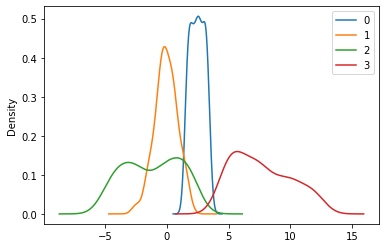

In [4]:
pd.DataFrame(test_data).plot(kind='kde');

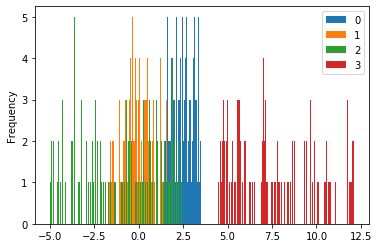

In [5]:
pd.DataFrame(test_data).plot(kind='hist', bins=300);

### StandardScaler

The most commonly used scaler—as the name indicates—is `StandardScaler`. 

This standardizes features by removing the mean and scaling to unit variance.  It loosely assumes that the underlying data is Gaussian to start with, but mostly it is fairly robust against moderate violations of that distribution.  Calculating the mean and standard deviation is per-column (as for all scalers).

In [6]:
from sklearn.preprocessing import StandardScaler
scaled1 = StandardScaler().fit_transform(test_data)
scaled1[:5]

array([[-1.55392407,  1.22209773,  0.66623525, -0.32388783],
       [-1.13357364, -0.42916845,  1.42995738, -0.25648603],
       [ 1.16894281,  0.7715245 , -0.77135935,  1.75312406],
       [ 0.26160548, -0.230076  , -0.68150969,  1.88157294],
       [ 1.13172565, -2.77406022,  0.26191177, -0.23911244]])

In [7]:
pd.DataFrame(scaled1).describe().head(3)

,0,1,2,3
count,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
mean,-2.353673e-16,-4.912737e-17,1.387779e-17,-1.127987e-15
std,1.005038e+00,1.005038e+00,1.005038e+00,1.005038e+00


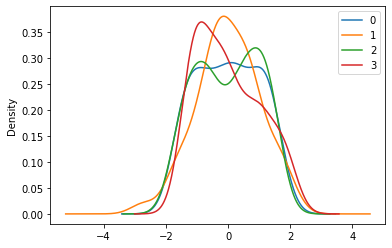

In [8]:
pd.DataFrame(scaled1).plot(kind='kde');

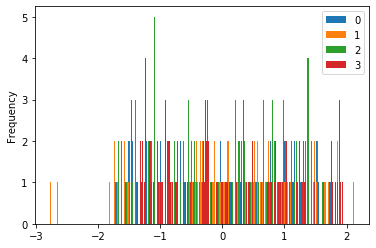

In [9]:
pd.DataFrame(scaled1).plot(kind='hist', bins=300);

### RobustScaler

This scales features using statistics that are robust to outliers. It removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [10]:
from sklearn.preprocessing import RobustScaler
scaled2 = RobustScaler().fit_transform(test_data)
scaled2[:5]

array([[-0.86534898,  1.03129998,  0.29299363, -0.05525033],
       [-0.63031131, -0.32027773,  0.72611465, -0.01632959],
       [ 0.65713377,  0.66250133, -0.52229299,  1.14410694],
       [ 0.14979885, -0.1573186 , -0.47133758,  1.21827892],
       [ 0.63632391, -2.23959488,  0.06369427, -0.00629733]])

In [11]:
pd.DataFrame(scaled2).describe().head(3)

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.003523,0.031001,-0.084841,0.131777
std,0.561964,0.822633,0.569976,0.580353


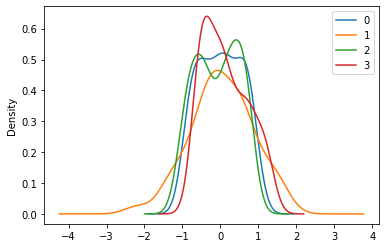

In [12]:
pd.DataFrame(scaled2).plot(kind='kde');

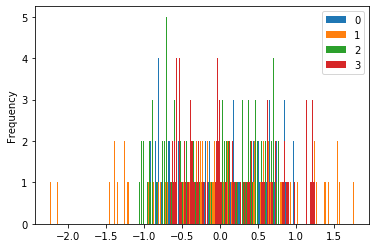

In [13]:
pd.DataFrame(scaled2).plot(kind='hist', bins=300);

### MinMaxScaler

Transforms features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, by default between zero and one.

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaled3 = MinMaxScaler().fit_transform(test_data)
scaled3[:5]

array([[0.04231613, 0.81639773, 0.71621622, 0.31562066],
       [0.16459742, 0.47905121, 0.94594595, 0.33612575],
       [0.83440681, 0.72434757, 0.28378378, 0.94749286],
       [0.57045948, 0.51972494, 0.31081081, 0.9865698 ],
       [0.82358022, 0.        , 0.59459459, 0.34141117]])

In [15]:
pd.DataFrame(scaled3).describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.494358,0.566728,0.515811,0.414154
std,0.292369,0.205325,0.302318,0.305754
min,0.000000,0.000000,0.000000,0.000000
25%,0.238324,0.451325,0.243243,0.146056
50%,0.492525,0.558991,0.560811,0.344729
75%,0.758586,0.700919,0.773649,0.672899
max,1.000000,1.000000,1.000000,1.000000


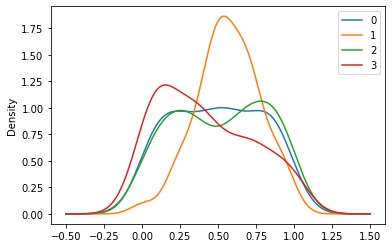

In [16]:
pd.DataFrame(scaled3).plot(kind='kde');

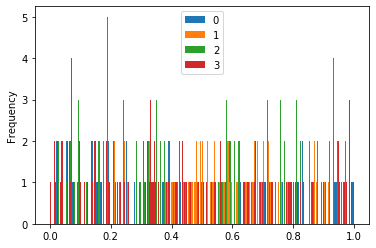

In [17]:
pd.DataFrame(scaled3).plot(kind='hist', bins=300);

### MaxAbsScaler

Scales each feature by its maximum absolute value.  This estimator scales and translates each feature individually such that the maximal absolute value of each feature in the training set will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.

In [18]:
from sklearn.preprocessing import MaxAbsScaler
scaled4 = MaxAbsScaler().fit_transform(test_data)
scaled4[:5]

array([[ 0.45542331,  0.40305018,  0.06      ,  0.5706176 ],
       [ 0.52495725, -0.17670901,  0.4       ,  0.58348258],
       [ 0.90583721,  0.24485401, -0.58      ,  0.96705681],
       [ 0.75574638, -0.1068077 , -0.54      ,  0.99157384],
       [ 0.89968078, -1.        , -0.12      ,  0.58679868]])

In [19]:
pd.DataFrame(scaled4).describe()

,0,1,2,3
count,100.000000,100.000000,100.000000,100.000000
mean,0.712472,-0.026028,-0.236600,0.632438
std,0.166252,0.352869,0.447431,0.191832
min,0.431361,-1.000000,-1.000000,0.372596
25%,0.566881,-0.224359,-0.640000,0.464232
50%,0.711430,-0.039326,-0.170000,0.588880
75%,0.862723,0.204591,0.145000,0.794775
max,1.000000,0.718587,0.480000,1.000000


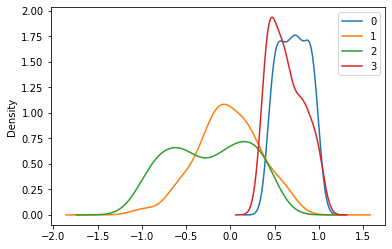

In [20]:
pd.DataFrame(scaled4).plot(kind='kde');

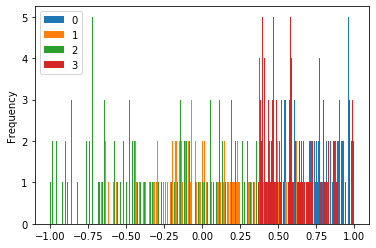

In [21]:
pd.DataFrame(scaled4).plot(kind='hist', bins=300);

### ...and others

A number of other scalers exists for special purposes.  An interesting one is `QuantileTransformer` that normalizes feature values by quantile (default `n_quantiles=1000`).  In effect this treats values in an ordinal way, eliminating any effect of outliers.  Output distributions other than the default `'uniform'` can be selected as well.

## Feature Selection

One way to reduce features in a dataset is to throw some of them away.  In principle, features thrown away can be engineered features such as those resulting from decompositions or those discussed below that are combined or synthesized from raw features.  Scikit-learn gives you several ways to choose features to discard; or euqivalently, features to keep.

There are several univariate feature selectors in scikit-learn.  `SelectKBest` is essentially the same as `SelectPercentile`, merely different in whether you indicate a number of percentage of features to keep.  Obviously, it is easy to derive one from the other based on number of features in the raw data. Just slightly different are false positive rate (`SelectFpr`), false discovery rate (`SelectFdr`), or family wise error (`SelectFwe`).  

All of these let you specify a scoring function the judges the quality of the estimate using just one feature.  For regression, there are `f_regression`, `mutual_info_regression`; for classification: `chi2`, `f_classif`, `mutual_info_classif`.  You can also, in principle, use a custom function to evaluate strength of a single feature for prediction.

In [22]:
cancer = load_breast_cancer()

### Univariate

Let us look at the Wisconsin cancer dataset from perspective of simply identifying the most important features (in the raw dataset).  Notice that we use the entire dataset for this purpose, not only a training portion of it.

Notes: 
* Idea: make predictions with each feature and decide which ones are most useful

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selector = SelectKBest(chi2, k=5)
X_new = selector.fit_transform(cancer.data, cancer.target)
cancer.data.shape, X_new.shape

((569, 30), (569, 5))

In [24]:
kbest = pd.Series(selector.scores_, index=cancer.feature_names).sort_values(ascending=False)
kbest.head(10)

worst area         112598.431564
mean area           53991.655924
area error           8758.504705
worst perimeter      3665.035416
mean perimeter       2011.102864
worst radius          491.689157
mean radius           266.104917
perimeter error       250.571896
worst texture         174.449400
mean texture           93.897508
dtype: float64

Let us take a look at how models work with all 30 features versus with just the top 5 in a univariate filter.  In this example, we do not get better with this step alone (but KNN doesn't get much worse), but in some cases the score will actually improve without surplus dimensions.

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
lr, knn = LinearRegression(), KNeighborsClassifier()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1)
print("Fit raw features:")
print(" LR:", lr.fit(X_train, y_train).score(X_test, y_test))
print("KNN:", knn.fit(X_train, y_train).score(X_test, y_test))

Fit raw features:
 LR: 0.722268601197212
KNN: 0.9370629370629371


We do *worse* with only five of the thirty features, but for KNN, not very much worse!

In [27]:
X_train, X_test, y_train, y_test = train_test_split(
    X_new, cancer.target, random_state=1)
print("Fit selected features:")
print(" LR:", lr.fit(X_train, y_train).score(X_test, y_test))
print("KNN:", knn.fit(X_train, y_train).score(X_test, y_test))

Fit selected features:
 LR: 0.5857835011372031
KNN: 0.9230769230769231


### Model-based Feature Selection

A number of selectors are based on the chosen underlying model itself rather on univariate strengths of features.  This only works with models than expose a `.coef_` or `.feature_importances_` attribute on a trained model.  Not all algorithms allow the determination of those values.

We look here at **recursive feature elimination** which is based on a model, and arrives at the most important features by eliminating the least important, then refitting based on those that remain, and doing so repeatedly until only the number of features requested remain.  The selector `SelectFromModel` works in a similar way, but recursive selection will generally be better quality (albeit **much** slower since it involves repeated refitting).

In [28]:
# Recursive feature elimination
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(estimator=lr, n_features_to_select=5, step=1) 
rfe.fit(cancer.data, cancer.target)

pd.Series(rfe.ranking_, index=cancer.feature_names).sort_values(ascending=False).head(10)

mean area            26
worst area           25
mean texture         24
area error           23
worst perimeter      22
texture error        21
worst texture        20
worst compactness    19
mean perimeter       18
mean radius          17
dtype: int64

The relative importance of features is similar, but somewhat different under recursive feature elimination than under K-best selection.  Given the nature of linear models, we mostly expect univariate elimination to behave similarly to recursive elimination based on linear regression.  Something like a decision tree (which provides `.feature_importances_`) might have a more different ranking of selected features.

We can go farther here and use `RFECV` to recursive eliminate features, cross-validate the model at each stage, and keep a record of the relationship between model score and number of features.

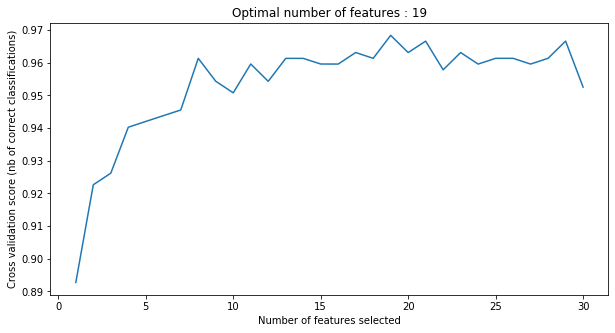

In [29]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

rf = RandomForestClassifier(max_depth=7, random_state=1)
rfecv = RFECV(estimator=rf)
rfecv.fit(cancer.data, cancer.target)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.title("Optimal number of features : %d" % rfecv.n_features_)
plt.show()

## Comparing Selectors

In the right circumstances, it can make a **huge** difference to create synthetic features and then to select among them in the best way.  Let's go all out in trying to create a genuinely *good* model for this cancer data.  That often involves everything we have seen: polynomial expansion, scaling, and feature selection.

Given relatively high initial accuracy, it is more illustrative to look at how often a model is *wrong* than its accuracy to highlight differences.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(cancer.data)
rfc = RandomForestClassifier(max_depth=7, random_state=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=42)

acc = rfc.fit(X_train, y_train).score(X_test, y_test)
print(f"Raw features, error rate: {(1-acc)*100:.2f}%")

Raw features, error rate: 3.50%


In [32]:
# Scale the engineered features (good practice, not directly helpful here)
# NOTE: we use MinMaxScaler here rather than StandardScaler,
#       because chi^2 test requires positive features
from sklearn.preprocessing import MinMaxScaler
X_poly_scaled = MinMaxScaler().fit_transform(X_poly)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly_scaled, cancer.target, random_state=42)

acc = rfc.fit(X_train, y_train).score(X_test, y_test)
print(f"Scaled polynomial features, error rate: {(1-acc)*100:.2f}%")

Scaled polynomial features, error rate: 2.10%


Select only the best 100 features in a univariate variate way rather than swamp the model with all 496 features.

In [33]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=100)
X_new = selector.fit_transform(X_poly_scaled, cancer.target)
X_train, X_test, y_train, y_test = train_test_split(
    X_new, cancer.target, random_state=42)

acc = rfc.fit(X_train, y_train).score(X_test, y_test)
print(f"Univariate best 100 poly, error rate: {(1-acc)*100:.2f}%")

Univariate best 100 poly, error rate: 1.40%


If we spend a while longer, we can use *Recursive Features Elimination with Cross-Validation* on all 496 of our polynomial features.  This involves retraining a Random Forest composed of 7 Decision Trees 496 separate times.  So it is some computational work.  

The `n_jobs=-1` parameter says to use all the CPU cores on the current machine (on the machine I usually teach on, that is 8 cores).

In [34]:
%%time
X_train, X_test, y_train, y_test = train_test_split(
    X_poly_scaled, cancer.target, random_state=42)

rfecv = RFECV(estimator=rfc, n_jobs=-1)
acc = rfecv.fit(X_train, y_train).score(X_test, y_test)
print(f"RFECV best {rfecv.n_features_} of {X_poly_scaled.shape[1]}", 
      f"error rate: {(1-acc)*100:.2f}%")

RFECV best 37 of 496 error rate: 0.70%
CPU times: user 2min 30s, sys: 3.24 s, total: 2min 33s
Wall time: 10min 17s


The result here is that there are 37 synthetic features—not so different in number from the original 30 dimensions—that are not only vastly better than the original features, but in facts have half the error rate of choosing 100 of the polynomial features in a univariate way.

For what it is worth, I tried `k=50` and `k=100` is better, but I did not try every univariate k.  But remember that the order of selection of univariate features is fixed, so we would definitely have to go to more than 100 features to get these 37 "Goldilocks" features (and going too high will weaken the model because of the *curse of dimensionality*).

As a passing note, I also tried using a degree-3 polynomial to create thousands of synthetic features, then after a very long run time (hours), produced something worse than the degree-2 example above.  The problem was that RFECV still selected over a thousand features in this example. Possibly other mechanisms to more aggressively winnow degree-3 features could eek out an incremental gain, but also likely is that degree-2 is best suited for this dataset.

## Next lesson

**Pipelines**: In this lesson we dealt with quite a lot of what we might call *data engineering*. The need for feature selection, feature engineering, and scaling, goes beyond the base fact that "data always comes in messy."  Certainly the need for data cleaning is important, and has probably not been addressed to match that importance in this course.  But even data that is spotless for an data integrity and anomaly perspective (a lofty goal) might still need to be massaged to allow models to succeed in their magic.

The next lesson on pipelines will be fairly short, but very important.  We have seen a variety of ways we can manipulate data—and also ways we can tune models with hyperparameters—but we have done each of these steps one-by-one, in explicit code with extra intermediate steps lying around along the way.  Pipelines allow us to package all these steps together in one resusable API.

<a href="Pipelines.ipynb"><img src="img/open-notebook.png" align="left"/></a>